In [1495]:
import numpy as np
import pandas as pd

import mplfinance as mpf
from datetime import datetime, timedelta, timezone
from dateutil.relativedelta import relativedelta, FR

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('seaborn-colorblind')

import warnings
warnings.simplefilter('ignore')

In [1416]:
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,2.221850e+08
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,1.851680e+08
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,3.449460e+08
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,5.101990e+08
...,...,...,...,...,...,...,...
1741,2021-10-08,53802.144531,55922.980469,53688.054688,53967.847656,53967.847656,3.480087e+10
1742,2021-10-09,53929.781250,55397.945313,53735.144531,54968.222656,54968.222656,3.249121e+10
1743,2021-10-10,54952.820313,56401.304688,54264.257813,54771.578125,54771.578125,3.952779e+10
1744,2021-10-11,54734.125000,57793.039063,54519.765625,57484.789063,57484.789063,4.263733e+10


In [1417]:
df.drop('Adj Close', axis=1, inplace= True)

In [1418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1746 non-null   object 
 1   Open    1742 non-null   float64
 2   High    1742 non-null   float64
 3   Low     1742 non-null   float64
 4   Close   1742 non-null   float64
 5   Volume  1742 non-null   float64
dtypes: float64(5), object(1)
memory usage: 82.0+ KB


In [1419]:
df = df.fillna(method = 'ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1746 non-null   object 
 1   Open    1746 non-null   float64
 2   High    1746 non-null   float64
 3   Low     1746 non-null   float64
 4   Close   1746 non-null   float64
 5   Volume  1746 non-null   float64
dtypes: float64(5), object(1)
memory usage: 82.0+ KB


In [1420]:
df.index = pd.to_datetime(df['Date'])
del df['Date']
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1746 entries, 2017-01-01 to 2021-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1746 non-null   float64
 1   High    1746 non-null   float64
 2   Low     1746 non-null   float64
 3   Close   1746 non-null   float64
 4   Volume  1746 non-null   float64
dtypes: float64(5)
memory usage: 81.8 KB


daily


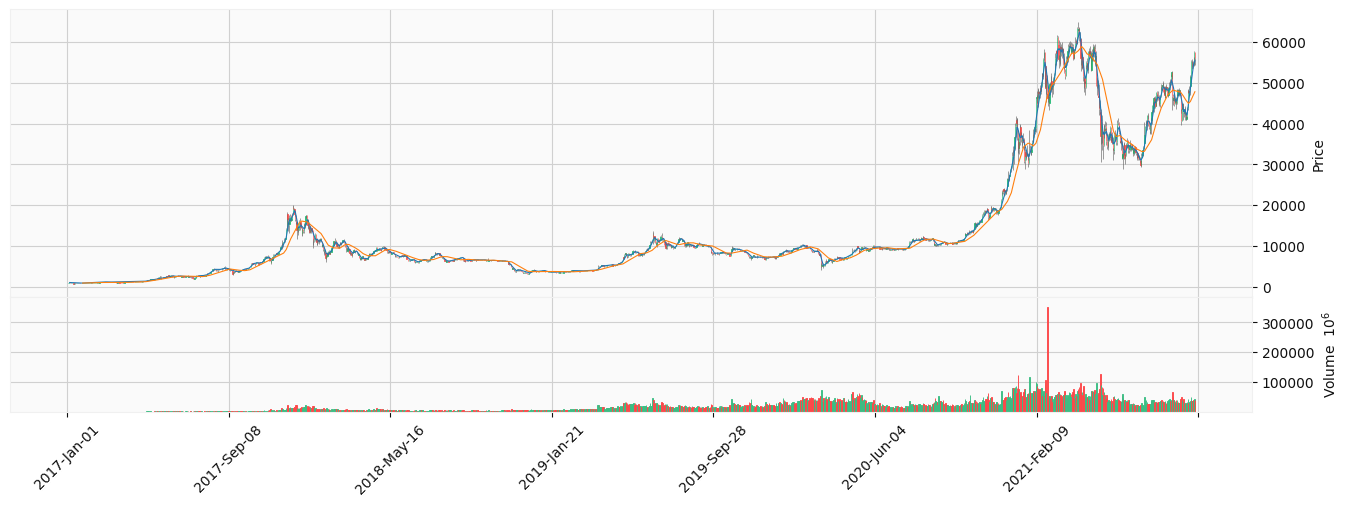

In [1421]:
# plot candles via mplfinance (daily, with 5 & 25 days moving average)
print('daily')
mpf.plot(
    df
    , type='candle'
    , volume=True
    , figratio=(12,4)
    , mav=(5, 25)
    , style='yahoo'
)

In [1422]:
d_ohlcv = {'Open': 'first',
           'High': 'max',
           'Low': 'min',
           'Close': 'last',
           'Volume': 'sum'}

df_w = df.resample('W-MON', closed='left', label='left').agg(d_ohlcv)
print(df_w.head())

                  Open         High         Low       Close        Volume
Date                                                                     
2016-12-26  963.658020  1003.080017  958.698975  998.325012  1.477750e+08
2017-01-02  998.617004  1191.099976  823.556030  911.198975  2.052639e+09
2017-01-09  913.244019   919.447998  755.755981  821.797974  1.123985e+09
2017-01-16  821.783020   937.525024  820.270996  924.672974  8.836116e+08
2017-01-23  925.499023   928.265991  891.687012  919.495972  6.931519e+08


weekly


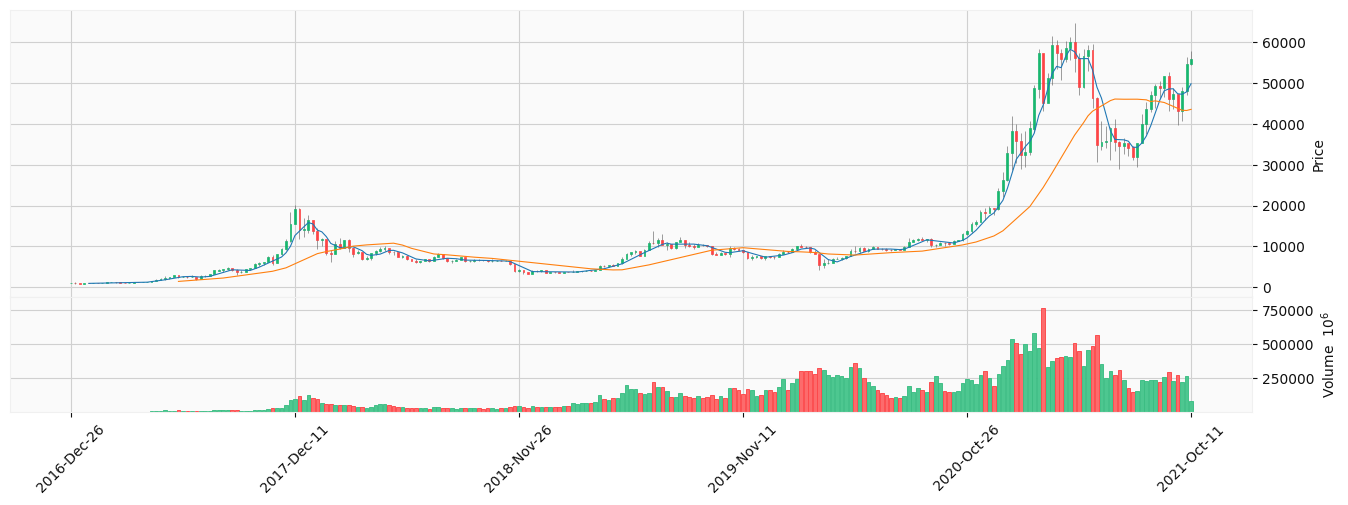

In [1423]:
print('weekly')
mpf.plot(
    df_w
    , type='candle'
    , volume=True
    , figratio=(12,4)
    , mav=(5, 25)
    , style='yahoo'
)

In [1489]:
df_m = df.resample('M', closed='left', label='left').agg(d_ohlcv)
print(df_m.head())

                   Open         High          Low        Close        Volume
Date                                                                        
2016-12-31   920.151001   923.047974   919.473999   920.382019  7.822730e+07
2017-01-31   920.958984  1200.390015   920.958984  1179.969971  4.262387e+09
2017-02-28  1180.719971  1280.310059   903.713013  1026.430054  1.061012e+10
2017-03-31  1026.640015  1331.280029  1026.640015  1321.790039  9.791620e+09
2017-04-30  1321.869995  2763.709961  1314.920044  2175.469971  3.313014e+10


monthly


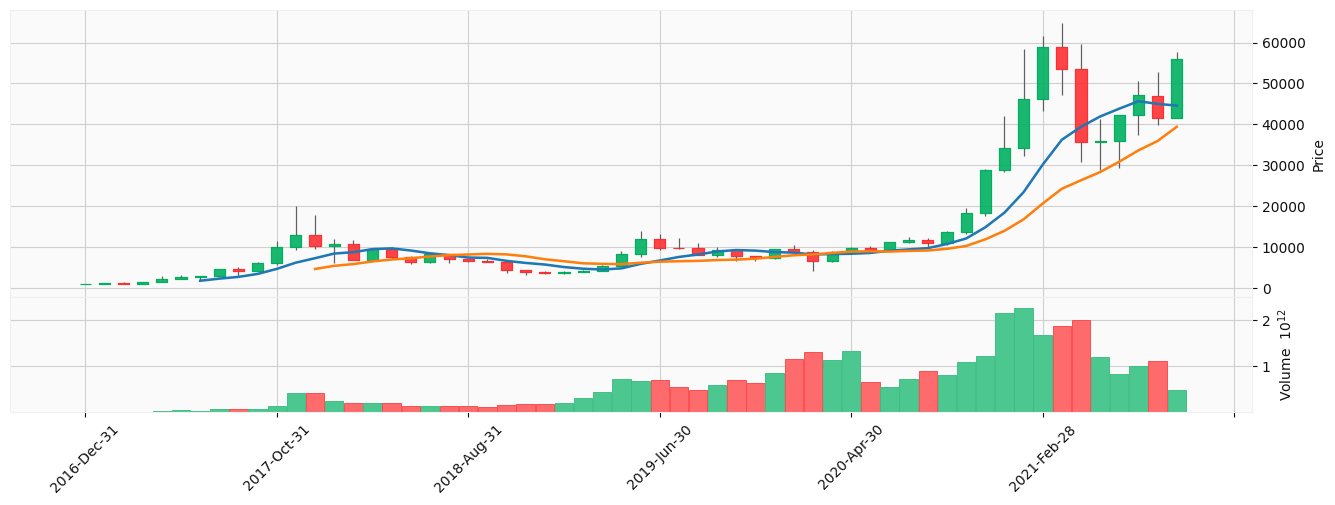

In [1494]:
print('monthly')
mpf.plot(
    df_m
    , type='candle'
    , volume=True
    , figratio=(12,4)
    , mav=(7, 13)
    , style='yahoo'
)

In [1424]:
'''
df['day'] = pd.to_datetime(df.index).day
df['month'] = pd.to_datetime(df.index).month
df['year'] = pd.to_datetime(df.index).year
df['dayofweek'] = pd.to_datetime(df.index).dayofweek
df['ym'] = df['year'].astype(str) + '_' + df['month'].astype(str)
print(df.shape)
df.tail()
'''

"\ndf['day'] = pd.to_datetime(df.index).day\ndf['month'] = pd.to_datetime(df.index).month\ndf['year'] = pd.to_datetime(df.index).year\ndf['dayofweek'] = pd.to_datetime(df.index).dayofweek\ndf['ym'] = df['year'].astype(str) + '_' + df['month'].astype(str)\nprint(df.shape)\ndf.tail()\n"

In [1425]:
df['Volume_past'] = df.Volume.shift()
df[['Volume','Volume_past']].head()

,Volume,Volume_past
Date,,
2017-01-01,147775008.0,NaN
2017-01-02,222184992.0,147775008.0
2017-01-03,185168000.0,222184992.0
2017-01-04,344945984.0,185168000.0
2017-01-05,510199008.0,344945984.0


In [1426]:
df['Change'] = df['Open'].diff(1)
df.Change.to_frame()
df = df[1:]

In [1427]:
df['Loss']=0
df['Gain']=0

for i in range(len(df)):
    if df['Change'][i]>=0:
        df['Gain'][i] = df['Change'][i]
    else:
        df['Loss'][i] = df['Change'][i]
df

,Open,High,Low,Close,Volume,Volume_past,Change,Loss,Gain
Date,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,2.221850e+08,1.477750e+08,34.958984,0,34
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1.851680e+08,2.221850e+08,22.982972,0,22
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,3.449460e+08,1.851680e+08,22.800048,0,22
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,5.101990e+08,3.449460e+08,112.329956,0,112
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,3.518760e+08,5.101990e+08,-142.489990,-142,0
...,...,...,...,...,...,...,...,...,...
2021-10-08,53802.144531,55922.980469,53688.054688,53967.847656,3.480087e+10,3.680786e+10,-1536.480469,-1536,0
2021-10-09,53929.781250,55397.945313,53735.144531,54968.222656,3.249121e+10,3.480087e+10,127.636719,0,127
2021-10-10,54952.820313,56401.304688,54264.257813,54771.578125,3.952779e+10,3.249121e+10,1023.039063,0,1023


In [1428]:
df['Loss'] = df.Loss*(-1)

In [1429]:
avg = pd.DataFrame()

In [1430]:
avg['avg_gain']= df['Gain'].rolling(window=14).mean().dropna()
avg['avg_loss']= df['Loss'].rolling(window=14).mean().dropna()

In [1431]:
df = pd.concat([df,avg],axis = 1)

In [1432]:
df.head(20)

,Open,High,Low,Close,Volume,Volume_past,Change,Loss,Gain,avg_gain,avg_loss
Date,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992.0,147775008.0,34.958984,0,34,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000.0,222184992.0,22.982972,0,22,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984.0,185168000.0,22.800048,0,22,NaN,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008.0,344945984.0,112.329956,0,112,NaN,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000.0,510199008.0,-142.489990,142,0,NaN,NaN
2017-01-07,903.487000,908.585022,823.556030,908.585022,279550016.0,351876000.0,-110.752990,110,0,NaN,NaN
2017-01-08,908.174988,942.723999,887.249023,911.198975,158715008.0,279550016.0,4.687988,0,4,NaN,NaN
2017-01-09,913.244019,913.685974,879.807007,902.828003,141876992.0,158715008.0,5.069031,0,5,NaN,NaN
2017-01-10,902.440002,914.872986,901.059998,907.679016,115808000.0,141876992.0,-10.804017,10,0,NaN,NaN


In [1433]:
null = df.isnull()
nulos = null[null['avg_gain']==True].index
nulos

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-14'],
              dtype='datetime64[ns]', name='Date', freq='D')

In [1434]:
df['avg_gain'].describe()

count    1732.000000
mean      219.767610
std       283.308778
min         4.428571
25%        48.482143
50%        96.107143
75%       238.142857
max      1585.214286
Name: avg_gain, dtype: float64

In [1435]:
RS = df['avg_gain'] / df['avg_loss']
df['RSI'] = 100 - (100 / (1 + RS ))

In [1436]:
df[15:25]

,Open,High,Low,Close,Volume,Volume_past,Change,Loss,Gain,avg_gain,avg_loss,RSI
Date,,,,,,,,,,,,
2017-01-17,830.945984,910.560974,830.796021,907.937988,155095008.0,82755200.0,9.162964,0,9,14.928571,28.642857,34.262295
2017-01-18,909.372986,917.499023,858.304016,886.617981,225676992.0,155095008.0,78.427002,0,78,18.928571,28.642857,39.789790
2017-01-19,888.335022,904.614014,884.338013,899.072998,105625000.0,225676992.0,-21.037964,21,0,10.928571,30.142857,26.608696
2017-01-20,898.171997,899.398010,887.007996,895.026001,86728400.0,105625000.0,9.836975,0,9,11.571429,20.000000,36.651584
2017-01-21,895.549011,927.367004,895.534973,921.789001,111158000.0,86728400.0,-2.622986,2,0,11.571429,12.285714,48.502994
2017-01-22,922.205017,937.525024,897.564026,924.672974,116573000.0,111158000.0,26.656006,0,26,13.142857,12.285714,51.685393
2017-01-23,925.499023,928.265991,916.737976,921.012024,73588600.0,116573000.0,3.294006,0,3,13.000000,12.285714,51.412429
2017-01-24,910.677002,924.145020,892.286011,892.687012,111349000.0,73588600.0,-14.822021,14,0,13.000000,12.571429,50.837989
2017-01-25,891.924011,903.252014,891.687012,901.541992,120831000.0,111349000.0,-18.752991,18,0,12.642857,13.857143,47.708895


## RSI

In [1437]:
df.RSI.describe()

count    1732.000000
mean       54.750121
std        19.005043
min         4.694280
25%        40.876342
50%        55.092487
75%        67.950862
max       100.000000
Name: RSI, dtype: float64

In [1438]:
n = 14 
n_highest_high = df["High"].rolling(n).max()
n_lowest_low = df["Low"].rolling(n).min()

K = (
    (df["Close"] - n_lowest_low) / 
    (n_highest_high - n_lowest_low)
) * 100

df.head(15)

,Open,High,Low,Close,Volume,Volume_past,Change,Loss,Gain,avg_gain,avg_loss,RSI
Date,,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992.0,147775008.0,34.958984,0,34,NaN,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000.0,222184992.0,22.982972,0,22,NaN,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984.0,185168000.0,22.800048,0,22,NaN,NaN,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008.0,344945984.0,112.329956,0,112,NaN,NaN,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000.0,510199008.0,-142.489990,142,0,NaN,NaN,NaN
2017-01-07,903.487000,908.585022,823.556030,908.585022,279550016.0,351876000.0,-110.752990,110,0,NaN,NaN,NaN
2017-01-08,908.174988,942.723999,887.249023,911.198975,158715008.0,279550016.0,4.687988,0,4,NaN,NaN,NaN
2017-01-09,913.244019,913.685974,879.807007,902.828003,141876992.0,158715008.0,5.069031,0,5,NaN,NaN,NaN
2017-01-10,902.440002,914.872986,901.059998,907.679016,115808000.0,141876992.0,-10.804017,10,0,NaN,NaN,NaN


## STOCHASTIC

In [1439]:
K.describe()

count    1732.000000
mean       57.474757
std        30.404945
min         0.000000
25%        30.856961
50%        61.786179
75%        86.186794
max       100.000000
dtype: float64

In [1440]:
df["Fast Stochastic"] = K.rolling(14).mean()

In [1441]:
df["Slow Stochastic"] = df["Fast Stochastic"].rolling(3).mean()
df.head()

,Open,High,Low,Close,Volume,Volume_past,Change,Loss,Gain,avg_gain,avg_loss,RSI,Fast Stochastic,Slow Stochastic
Date,,,,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992.0,147775008.0,34.958984,0,34,NaN,NaN,NaN,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000.0,222184992.0,22.982972,0,22,NaN,NaN,NaN,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984.0,185168000.0,22.800048,0,22,NaN,NaN,NaN,NaN,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008.0,344945984.0,112.329956,0,112,NaN,NaN,NaN,NaN,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000.0,510199008.0,-142.489990,142,0,NaN,NaN,NaN,NaN,NaN


In [1442]:
df["Slow Stochastic"].describe(), df["Fast Stochastic"].describe()

(count    1717.000000
 mean       57.351871
 std        22.630466
 min         8.941457
 25%        38.470439
 50%        59.345295
 75%        77.557332
 max        93.314137
 Name: Slow Stochastic, dtype: float64,
 count    1719.000000
 mean       57.371755
 std        22.745487
 min         8.230523
 25%        38.444095
 50%        59.259247
 75%        77.715646
 max        93.736208
 Name: Fast Stochastic, dtype: float64)

## VMA (Media móvil de volúmen)

In [1443]:
df['VMA'] = df['Volume'].rolling(window=7).mean() #Media movil de volumen

In [1444]:
df.VMA.describe() #Media movil de volumen

count    1.739000e+03
mean     2.026768e+10
std      1.962831e+10
min      9.902170e+07
25%      4.504767e+09
50%      1.543233e+10
75%      3.189081e+10
max      1.124811e+11
Name: VMA, dtype: float64

## Emas

In [1445]:
ema_3 = df['Close'].rolling(window=3).mean()
ema_13 =df['Close'].rolling(window=13).mean()
ema_9 = df['Close'].rolling(window=9).mean()
ema_12 = df['Close'].rolling(window=12).mean()
ema_26 = df['Close'].rolling(window=26).mean()
ema_7 = df['Close'].rolling(window=7).mean()
df['ema_7']= ema_7
df['ema_13'] =ema_13
df['ema_3'] = ema_3

In [1446]:
df['Desicion_ema_7'] = 0
df['Desicion_ema_13'] = 0
df['Desicion_ema_3'] = 0
for i in range(len(df['Close'])):
    if df['Close'][i]>df['ema_7'][i]:
        df['Desicion_ema_7'][i]= 1
        
    if df['Close'][i]>df['ema_13'][i]:
        df['Desicion_ema_13'][i]= 1
        
    if df['Close'][i]>df['ema_3'][i]:
        df['Desicion_ema_3'][i]= 1
        

In [1447]:
ema_13.describe()

count     1733.000000
mean     13539.581288
std      14612.081092
min        860.667687
25%       5307.997746
50%       8359.612117
75%      11503.771034
max      60149.504507
Name: Close, dtype: float64

## Bull Bear Power

In [1448]:
n_lowest_low.describe()

count     1732.000000
mean     11783.215015
std      12644.995947
min        755.755981
25%       4164.049805
50%       7446.988770
75%      10185.774414
max      55604.023438
Name: Low, dtype: float64

In [1449]:
n_lowest_low = df["Low"].rolling(7).min()
df['Bull_Bear_power'] = n_lowest_low - ema_13
df.Bull_Bear_power.describe()

count     1733.000000
mean     -1155.498516
std       1861.641617
min     -19500.790865
25%      -1258.089994
50%       -463.997765
75%       -183.183744
max        253.673829
Name: Bull_Bear_power, dtype: float64

## CONVERGENCIA/DIVERGENCIA DE LA MEDIA MÓVIL (MACD)

In [1450]:
df['MACD'] = ema_12 - ema_26 
df.MACD.describe()

count    1720.000000
mean      187.163440
std      1383.306491
min     -8134.497095
25%      -204.606807
50%        63.467115
75%       441.793659
max      7493.551182
Name: MACD, dtype: float64

In [1451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745 entries, 2017-01-02 to 2021-10-12
Freq: D
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1745 non-null   float64
 1   High             1745 non-null   float64
 2   Low              1745 non-null   float64
 3   Close            1745 non-null   float64
 4   Volume           1745 non-null   float64
 5   Volume_past      1745 non-null   float64
 6   Change           1745 non-null   float64
 7   Loss             1745 non-null   int64  
 8   Gain             1745 non-null   int64  
 9   avg_gain         1732 non-null   float64
 10  avg_loss         1732 non-null   float64
 11  RSI              1732 non-null   float64
 12  Fast Stochastic  1719 non-null   float64
 13  Slow Stochastic  1717 non-null   float64
 14  VMA              1739 non-null   float64
 15  ema_7            1739 non-null   float64
 16  ema_13           1733 non-null   f

In [1452]:
df = df[28:]

In [1453]:
df.head()

,Open,High,Low,Close,Volume,Volume_past,Change,Loss,Gain,avg_gain,...,Slow Stochastic,VMA,ema_7,ema_13,ema_3,Desicion_ema_7,Desicion_ema_13,Desicion_ema_3,Bull_Bear_power,MACD
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-30,920.151001,923.047974,919.473999,920.382019,78227296.0,60851700.0,-1.916016,1,0,10.928571,...,69.880890,9.968437e+07,913.290432,910.863385,920.489339,1,1,0,-19.176373,21.601028
2017-01-31,920.958984,972.018982,920.958984,970.403015,164582000.0,78227296.0,0.807983,0,0,10.285714,...,74.633448,1.072891e+08,924.392718,917.308387,936.760335,1,1,1,-25.621375,29.198158
2017-02-01,970.940979,989.114014,970.742004,989.023010,150110000.0,164582000.0,49.981995,0,49,8.214286,...,79.395526,1.114718e+08,936.890006,924.227619,959.936015,1,1,1,-22.003620,33.691933
2017-02-02,990.000977,1013.520020,983.221008,1011.799988,145820992.0,150110000.0,19.059998,0,19,9.571429,...,83.749708,1.134522e+08,950.349147,933.210233,990.408671,1,1,1,-17.364225,37.223042
2017-02-03,1011.460022,1033.869995,1008.789978,1029.910034,201278000.0,145820992.0,21.459045,0,21,10.428571,...,87.130175,1.242642e+08,966.086295,941.527236,1010.244344,1,1,1,-22.379226,41.426988


In [1454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1717 entries, 2017-01-30 to 2021-10-12
Freq: D
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1717 non-null   float64
 1   High             1717 non-null   float64
 2   Low              1717 non-null   float64
 3   Close            1717 non-null   float64
 4   Volume           1717 non-null   float64
 5   Volume_past      1717 non-null   float64
 6   Change           1717 non-null   float64
 7   Loss             1717 non-null   int64  
 8   Gain             1717 non-null   int64  
 9   avg_gain         1717 non-null   float64
 10  avg_loss         1717 non-null   float64
 11  RSI              1717 non-null   float64
 12  Fast Stochastic  1717 non-null   float64
 13  Slow Stochastic  1717 non-null   float64
 14  VMA              1717 non-null   float64
 15  ema_7            1717 non-null   float64
 16  ema_13           1717 non-null   f

## Porcentaje de cambio de precio

In [1455]:
df['Change'].describe()


count    1717.000000
mean       32.967248
std       864.599163
min     -6979.097656
25%      -123.470215
50%        12.190064
75%       169.557617
max      7298.164063
Name: Change, dtype: float64

In [1456]:
df['%_Change'] = (df.Change * 100)/df.Open
df['%_Change']

Date
2017-01-30   -0.208228
2017-01-31    0.087733
2017-02-01    5.147789
2017-02-02    1.925250
2017-02-03    2.121591
                ...   
2021-10-08   -2.855798
2021-10-09    0.236672
2021-10-10    1.861668
2021-10-11   -0.399559
2021-10-12    4.854616
Freq: D, Name: %_Change, Length: 1717, dtype: float64

In [1457]:
df['%_Change'].describe()

count    1717.000000
mean        0.149674
std         4.324825
min       -57.709897
25%        -1.538579
50%         0.228708
75%         2.081691
max        20.029525
Name: %_Change, dtype: float64

<AxesSubplot:>

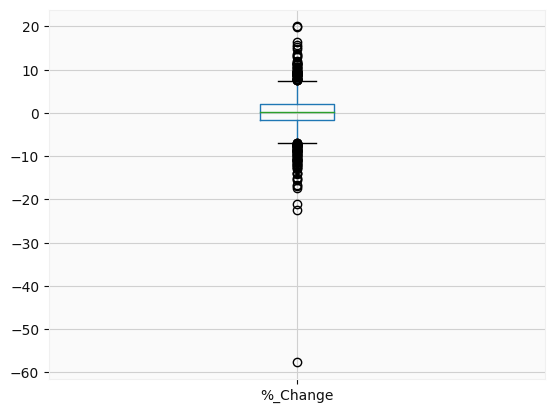

In [1458]:
df.boxplot('%_Change')

In [1459]:
df['Order'] = 0
for i in range(len(df.Order)):
    if df['%_Change'][i]<0:
        df['Order'][i] = 0
    else:
        df['Order'][i] = 1
df.Order.unique()

array([0, 1], dtype=int64)

In [1460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1717 entries, 2017-01-30 to 2021-10-12
Freq: D
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1717 non-null   float64
 1   High             1717 non-null   float64
 2   Low              1717 non-null   float64
 3   Close            1717 non-null   float64
 4   Volume           1717 non-null   float64
 5   Volume_past      1717 non-null   float64
 6   Change           1717 non-null   float64
 7   Loss             1717 non-null   int64  
 8   Gain             1717 non-null   int64  
 9   avg_gain         1717 non-null   float64
 10  avg_loss         1717 non-null   float64
 11  RSI              1717 non-null   float64
 12  Fast Stochastic  1717 non-null   float64
 13  Slow Stochastic  1717 non-null   float64
 14  VMA              1717 non-null   float64
 15  ema_7            1717 non-null   float64
 16  ema_13           1717 non-null   f

In [1461]:
df.Order.value_counts()

1    936
0    781
Name: Order, dtype: int64

In [1462]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_past', 'Change',
       'Loss', 'Gain', 'avg_gain', 'avg_loss', 'RSI', 'Fast Stochastic',
       'Slow Stochastic', 'VMA', 'ema_7', 'ema_13', 'ema_3', 'Desicion_ema_7',
       'Desicion_ema_13', 'Desicion_ema_3', 'Bull_Bear_power', 'MACD',
       '%_Change', 'Order'],
      dtype='object')

In [1463]:
df_new = df[['RSI', 'Slow Stochastic', 'Volume_past','Bull_Bear_power'
             ,'MACD', 'Desicion_ema_3','Desicion_ema_7','Desicion_ema_13','Order']]
df_new

,RSI,Slow Stochastic,Volume_past,Bull_Bear_power,MACD,Desicion_ema_3,Desicion_ema_7,Desicion_ema_13,Order
Date,,,,,,,,,
2017-01-30,73.205742,69.880890,6.085170e+07,-19.176373,21.601028,0,1,1,0
2017-01-31,72.000000,74.633448,7.822730e+07,-25.621375,29.198158,1,1,1,1
2017-02-01,67.251462,79.395526,1.645820e+08,-22.003620,33.691933,1,1,1,1
2017-02-02,79.289941,83.749708,1.501100e+08,-17.364225,37.223042,1,1,1,1
2017-02-03,80.662983,87.130175,1.458210e+08,-22.379226,41.426988,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2021-10-08,70.642500,62.233799,3.680786e+10,-618.492188,1572.809821,0,1,1,0
2021-10-09,78.214395,65.700771,3.480087e+10,-1523.083233,2249.037435,1,1,1,1
2021-10-10,79.751825,69.649242,3.249121e+10,-2487.379207,3098.440905,1,1,1,1


In [1464]:
y = df_new['Order']
X = df_new.drop(columns=['Order']).copy()


In [1465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [1466]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [1467]:
from sklearn.metrics import classification_report #resumen de métricas de clasificación 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier #clasificador
from sklearn.metrics import confusion_matrix #relación entre qué también estamos prediciendo las etiquetas
from sklearn import metrics
from sklearn import tree

## Modelo de árbol

In [1468]:
X.isnull().sum()

RSI                0
Slow Stochastic    0
Volume_past        0
Bull_Bear_power    0
MACD               0
Desicion_ema_3     0
Desicion_ema_7     0
Desicion_ema_13    0
dtype: int64

In [1469]:
params = {'random_state': 0, 'max_depth': 5} # 5 niveles de prfundidad
tree = DecisionTreeClassifier(**params) #solo un árbol
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [1470]:
y_pred = tree.predict(X_test) #score de entrenamiento para la prueba

In [1471]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
Date,,
2018-09-21,1,1
2020-10-09,1,1
2017-05-25,1,1
2017-06-14,1,0
2018-01-04,1,1
...,...,...
2020-05-11,0,0
2017-05-17,0,1
2019-11-03,1,0


In [1472]:
tree.score(X_train, y_train), tree.score(X_test, y_test) #al azar

(0.7174071376547706, 0.6540697674418605)

## Random Forest Classifier 

In [1496]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics

In [1474]:
y = df_new['Order']
X = df_new.drop(columns=['Order']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [1475]:
forest = RandomForestClassifier(n_estimators=20, max_depth=6) #20 árboles de 6 niveles de profundidad
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=20)

In [1482]:
y_pred = forest.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(10)

,Actual,Predicted
Date,,
2018-09-21,1,1
2020-10-09,1,1
2017-05-25,1,1
2017-06-14,1,0
2018-01-04,1,1
2018-12-25,1,0
2021-04-06,1,0
2017-09-27,0,1
2020-10-31,1,1


In [1497]:
metrics.accuracy_score(y_test, y_pred)

0.6453488372093024

In [1477]:
forest.score(X_train, y_train), forest.score(X_test, y_test)

(0.7530954115076475, 0.6453488372093024)

In [1498]:
metrics.f1_score(y_test, y_pred)

0.6755319148936171

In [1499]:
metrics.roc_auc_score(y_test, y_pred)

0.6428861513469608

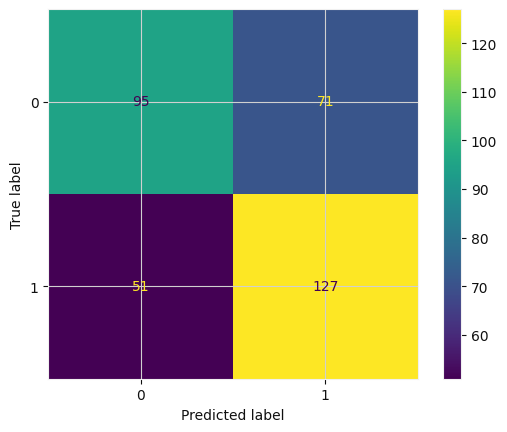

In [1486]:
metrics.plot_confusion_matrix(forest, X_test, y_test)

## 95 Ventas acertadas
## 125 Compras acertadas
## 51 Órdenes de Venta fallidas
## 71 Órdenes de Compra Fallidas

### 220 aciertos, 122 fallas, total 342 transacciones

#### Con 100dolares
### Si hubiera invertido solo el 3% de mi capital por operación, es decir 3dolares por operación y ganado el 70% por operación. Tendría 462 dolares positivos. Menos 366 dolares de operaciones fallidas
## Monto Final 100+96 = 196 dólares

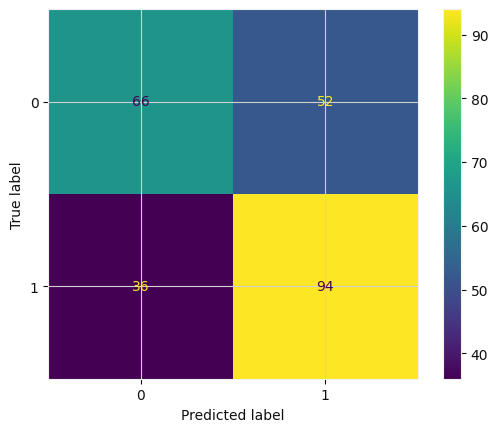

In [1488]:
metrics.plot_confusion_matrix(forest, X_test[:248], y_test[:248]) #248 días laborables

In [1478]:
X_train.columns

Index(['RSI', 'Slow Stochastic', 'Volume_past', 'Bull_Bear_power', 'MACD',
       'Desicion_ema_3', 'Desicion_ema_7', 'Desicion_ema_13'],
      dtype='object')

In [1479]:
X.tail()

,RSI,Slow Stochastic,Volume_past,Bull_Bear_power,MACD,Desicion_ema_3,Desicion_ema_7,Desicion_ema_13
Date,,,,,,,,
2021-10-08,70.642500,62.233799,3.680786e+10,-618.492188,1572.809821,0,1,1
2021-10-09,78.214395,65.700771,3.480087e+10,-1523.083233,2249.037435,1,1,1
2021-10-10,79.751825,69.649242,3.249121e+10,-2487.379207,3098.440905,1,1,1
2021-10-11,78.381714,74.022588,3.952779e+10,-1724.946815,4067.126077,1,1,1
2021-10-12,84.801272,78.745420,4.263733e+10,-1423.187200,4770.369266,0,1,1


In [1480]:
#Prueba hecha 18/10/2021
forest.predict([[72.45,91.81, 29032367511 , -8063.30, 3980.51, 0, 1, 1]])

array([0], dtype=int64)

## Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
df_conti = df[['RSI','Fast Stochastic', 'Slow Stochastic', 'VMA','Bears_power'
             ,'MACD','ema_13','Close']]
df_conti

In [ ]:
y = df_conti['Close']
X = df_conti.drop(columns=['Close']).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)


In [ ]:
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
train_score, test_score

In [ ]:
df_conti['prediction'] = 0
df_conti['prediction'][-344:]= linreg.predict(X[-344:])
df_conti

In [ ]:
df_conti[['Close','prediction']].tail(20)

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
df_conti['Close'][-365:].plot(figsize=[15, 6])
df_conti['prediction'][-365:].plot(figsize=[15, 6]);

In [ ]:
X[-344:]

## Series de Tiempo Holt Winters

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pylab import rcParams

# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
df = df.resample('D').sum()
df.head(10)

In [ ]:
df_time_series =df[-365:]
decomposition = sm.tsa.seasonal_decompose(df_time_series.Close, model='multiplicative')

In [ ]:
fig = decomposition.plot()
plt.rcParams.update({'figure.figsize': (15,30)})

plt.show();

In [ ]:
train = 3
df_train = df_time_series[:train]
df_test = df_time_series[train:]
df_train.info()

In [ ]:
def holt_winters_forecasting(data,name,periods, t_s):
    train = 358
    test = len(data)-train
    data_train = data[:train]
    data_test = data[train:]
    
    fitted_model = ExponentialSmoothing(data_train,trend=t_s, seasonal=t_s, seasonal_periods=periods).fit()
    test_predictions = fitted_model.forecast(test)
    
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    #data_train.plot(legend=True,label='TRAIN')
    #data_test.plot(legend=True,label='TEST',figsize=(15,6))
    #test_predictions.plot(legend=True,label='PREDICTION')
    #plt.title(f'{name}: Train, Test and Predicted Test using Holt Winters');

    data_test.plot(legend=True,label='TEST',figsize=(9,6))
    data_train.plot(legend=True,label='TRAIN',figsize=(9,6),xlim=['2021-09-02','2021-10-18'])
    test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-09-02','2021-10-18'])
    plt.title(f'ZOOM {name}: Train, Test and Predicted Test using Holt Winters');
    
    print(f'Mean Absolute Error = {mean_absolute_error(data_test,test_predictions)}')
    print(f'Mean Squared Error = {mean_squared_error(data_test,test_predictions)}')
    
    return test_predictions

In [ ]:
btc_prediction_Close = holt_winters_forecasting(df_time_series.Close, 'BTC/USD', 42, 'add')

In [ ]:
btc_prediction_Close